<a href="https://www.kaggle.com/code/junpitosalim/multiple-time-series-ml-model?scriptVersionId=141668930" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-competition-2023/train_TMA Ciliwung 2021-2022.xlsx
/kaggle/input/data-science-competition-2023/train_Curah hujan 2021-2022.xlsx
/kaggle/input/data-science-competition-2023/submission.csv
/kaggle/input/data-science-competition-2023/test_TMA Ciliwung 2023-2.xlsx
/kaggle/input/data-science-competition-2023/test_Curah hujan 2023.xlsx


### Import library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Conv1D, Dense, LSTM, Lambda
from tensorflow.keras.models import Model

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

load dataset

In [3]:
df_tma = pd.read_excel('/kaggle/input/data-science-competition-2023/train_TMA Ciliwung 2021-2022.xlsx')
df_ch = pd.read_excel('/kaggle/input/data-science-competition-2023/train_Curah hujan 2021-2022.xlsx')
submission = pd.read_csv('/kaggle/input/data-science-competition-2023/submission.csv')
test_tma = pd.read_excel('/kaggle/input/data-science-competition-2023/test_TMA Ciliwung 2023-2.xlsx')
test_ch = pd.read_excel('/kaggle/input/data-science-competition-2023/test_Curah hujan 2023.xlsx')

In [4]:
df_tma.head()

,Waktu,Pintu Air,Tinggi Air
0,2021-01-01 01:00:00,Depok,82.0
1,2021-01-01 01:00:00,Katulampa,27.0
2,2021-01-01 01:00:00,Manggarai,530.0
3,2021-01-01 01:00:00,Manggarai,528.0
4,2021-01-01 01:00:00,Marina Ancol,165.0


In [5]:
df_ch.head()

,Pos Pantau,Waktu,Intensitas
0,Balekambang,2021-11-21 08:00:00,0
1,Balekambang,2021-11-21 09:00:00,0
2,Balekambang,2021-11-21 19:00:00,0
3,Balekambang,2021-11-21 20:00:00,0
4,Balekambang,2021-11-21 21:00:00,0


In [6]:
submission.head()

,ID,Prediksi 6 Jam Ke Depan
0,1,NaN
1,2,NaN
2,3,NaN
3,5,NaN
4,6,NaN


In [7]:
test_tma.head()

,Waktu,Pintu Air,Tinggi Air,ID,Prediksi 6 Jam Ke Depan
0,2023-01-01 00:00:00,Depok,100.0,1,NaN
1,2023-01-01 00:00:00,Katulampa,20.0,2,NaN
2,2023-01-01 00:00:00,Manggarai,635.0,3,NaN
3,2023-01-01 00:00:00,Marina Ancol,159.0,4,NaN
4,2023-01-01 01:00:00,Depok,133.0,5,NaN


In [8]:
test_ch.head()

,Pos Pantau,Waktu,Intensitas
0,Balekambang,2023-01-01 07:00:00,8
1,Balekambang,2023-01-01 08:00:00,12
2,Balekambang,2023-01-01 09:00:00,12
3,Balekambang,2023-01-01 10:00:00,12
4,Balekambang,2023-01-01 11:00:00,12


# Analisa Awal
pada bagian data akan di analisa dan di tentukan perlakuan yang tepat pada data sehingga data siap di gunakan pada pemodelan nantinya

In [9]:
df_tma.head(20)

,Waktu,Pintu Air,Tinggi Air
0,2021-01-01 01:00:00,Depok,82.0
1,2021-01-01 01:00:00,Katulampa,27.0
2,2021-01-01 01:00:00,Manggarai,530.0
3,2021-01-01 01:00:00,Manggarai,528.0
4,2021-01-01 01:00:00,Marina Ancol,165.0
5,2021-01-01 01:00:00,Marina Ancol,157.0
6,2021-01-01 02:00:00,Depok,82.0
7,2021-01-01 02:00:00,Katulampa,26.0
8,2021-01-01 02:00:00,Manggarai,526.0
9,2021-01-01 02:00:00,Manggarai,530.0


terlihat data memiliki beberapa sample yang di ambil lebih dari satu kali pada jam yang sama. saya memilih untuk melakukan agregasi pada data tersebut dengan mengambil nilai rata-rata pada jam yang sama yang memiliki sample lebih dari 1 kali

## Agragasi sample yang diambil lebih dari satu kali pada interval yang sama

In [10]:
def agregasi(df):
  #ubah format kolom 'waktu' menjadi datetine
  time = 'Waktu'
  locate = 'Pintu Air'
  tma = 'Tinggi Air'
  df[time] = pd.to_datetime(df[time])
  #agregasi data berdasar waktu dan pintu air dan ambil nilai rata-rata
  ag_df_tma = df.groupby([time,locate])[tma].mean().reset_index()

  return ag_df_tma

In [11]:
ag_tma = agregasi(df_tma)
ag_tma.head(20)

,Waktu,Pintu Air,Tinggi Air
0,2021-01-01 01:00:00,Depok,82.0
1,2021-01-01 01:00:00,Katulampa,27.0
2,2021-01-01 01:00:00,Manggarai,529.0
3,2021-01-01 01:00:00,Marina Ancol,161.0
4,2021-01-01 02:00:00,Depok,82.0
5,2021-01-01 02:00:00,Katulampa,26.0
6,2021-01-01 02:00:00,Manggarai,528.0
7,2021-01-01 02:00:00,Marina Ancol,172.0
8,2021-01-01 03:00:00,Depok,85.0
9,2021-01-01 03:00:00,Katulampa,26.0


### pemisahan tiap pintu air ke pivot kolom

hal ini bertujuan untuk:
* membantu memudahkan model deep learning yang di kembangkan kedepannya memahami pola dan tren khusus setiap pintu air
* memudahkan visualisasi yang terfokus pada masing-masing pintu air
* memberikan informasi yang lebih rinci

In [12]:
def separate_pintu_air(df):
    # Membuat pivot table berdasarkan kolom 'Pintu Air' dengan 'Tinggi Air' sebagai nilai
    pivot_df = df.pivot(index='Waktu', columns='Pintu Air', values='Tinggi Air')
    pivot_df.reset_index(inplace=True)

    return pivot_df

In [13]:
df_pvt =separate_pintu_air(ag_tma)
df_pvt.head(24)

Pintu Air,Waktu,Depok,Katulampa,Manggarai,Marina Ancol
0,2021-01-01 01:00:00,82.0,27.0,529.0,161.0
1,2021-01-01 02:00:00,82.0,26.0,528.0,172.0
2,2021-01-01 03:00:00,85.0,26.0,527.0,177.0
3,2021-01-01 04:00:00,83.0,10.0,526.5,181.0
4,2021-01-01 05:00:00,83.0,28.0,526.5,188.0
5,2021-01-01 06:00:00,83.0,29.0,523.0,187.0
6,2021-01-01 07:00:00,83.0,28.0,526.5,192.0
7,2021-01-01 08:00:00,83.0,27.0,526.5,194.0
8,2021-01-01 09:00:00,83.0,26.0,526.0,236.0
9,2021-01-01 10:00:00,83.0,10.0,523.0,242.0


**check informasi dari setiap kolom**

In [14]:
df_pvt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17519 entries, 0 to 17518
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Waktu         17519 non-null  datetime64[ns]
 1   Depok         16886 non-null  float64       
 2   Katulampa     16716 non-null  float64       
 3   Manggarai     16858 non-null  float64       
 4   Marina Ancol  17078 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 684.5 KB


### visualisasi setiap series waktu yang ada pada dataset

In [15]:
def plot_time_series(df, title):
    num_columns = len(df.columns)
    fig, axes = plt.subplots(num_columns, 1, figsize=(10, 6*num_columns))
    
    for idx, column in enumerate(df.columns):
        ax = axes[idx]
        ax.plot(df.index, df[column])
        ax.set_xlabel('Waktu')
        ax.set_ylabel('Tinggi Air')
        ax.set_title(column)
        ax.grid(True)
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots
    plt.suptitle(title, y=1.02)  # Add main title above subplots
    plt.show()

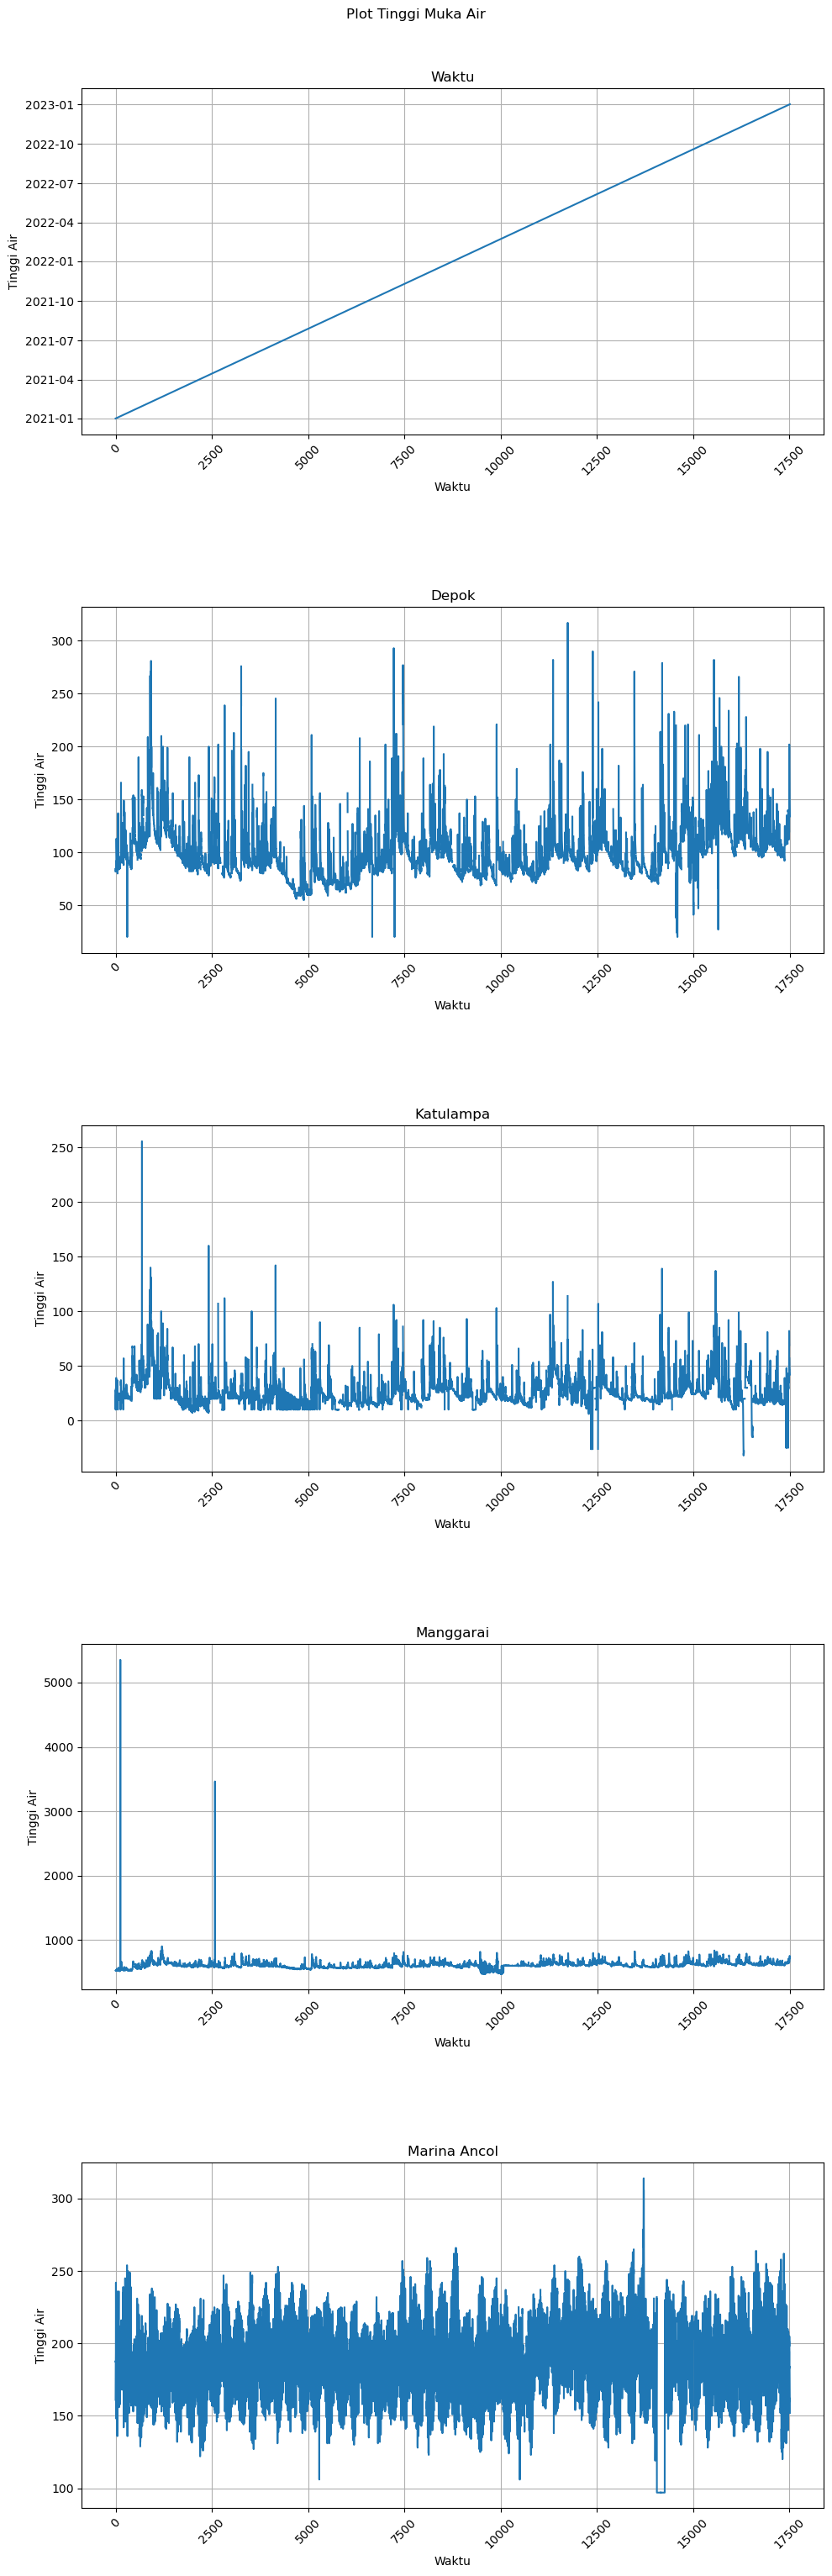

In [16]:
plot_time_series(df_pvt, 'Plot Tinggi Muka Air')

### Analisa Data yang kosong

In [17]:
df_pvt.isnull().sum()

Pintu Air
Waktu             0
Depok           633
Katulampa       803
Manggarai       661
Marina Ancol    441
dtype: int64

dari hasil check null diatas dilihat kalau data memiliki 3% value yang null. selanjutnya kita akan lihat di bagian mana data null tersebut berada

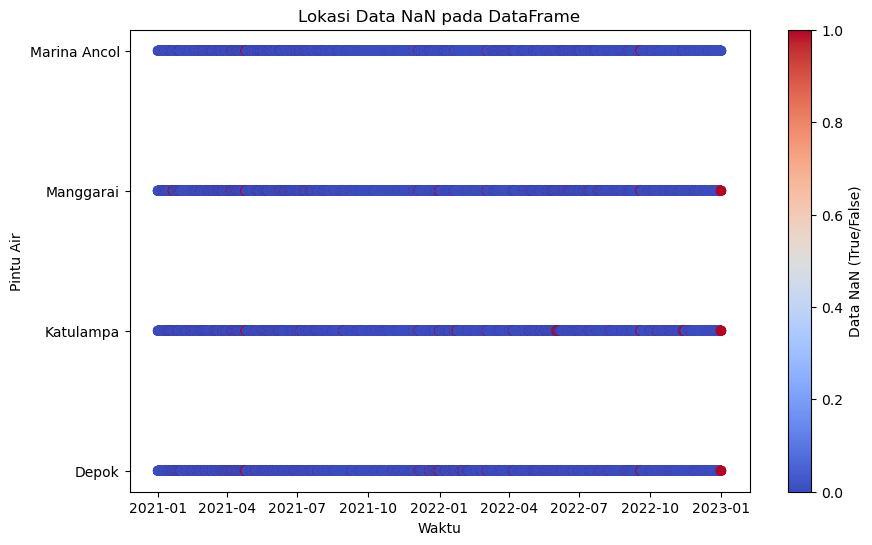

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [18]:
def nan_viz(df):
  plt.figure(figsize=(10, 6))
  plt.scatter(df['Waktu'], df['Pintu Air'], c=df['Tinggi Air'].isna(), cmap='coolwarm')
  plt.title("Lokasi Data NaN pada DataFrame")
  plt.xlabel("Waktu")
  plt.ylabel("Pintu Air")
  plt.colorbar(label="Data NaN (True/False)")
  plt.show()
  return plt
nan_viz(df_tma)

### isi data yang kosong menggunakan forward fill 

In [19]:
def forward_fill_nan(data):
    filled_data = data.fillna(method='ffill')
    return filled_data

filled_df = forward_fill_nan(df_pvt)

In [20]:
filled_df.tail(10)

Pintu Air,Waktu,Depok,Katulampa,Manggarai,Marina Ancol
17509,2022-12-31 14:00:00,134.0,42.0,718.0,183.0
17510,2022-12-31 15:00:00,134.0,42.0,718.0,184.0
17511,2022-12-31 16:00:00,134.0,42.0,718.0,179.0
17512,2022-12-31 17:00:00,134.0,42.0,718.0,174.0
17513,2022-12-31 18:00:00,134.0,42.0,718.0,169.0
17514,2022-12-31 19:00:00,134.0,42.0,718.0,173.0
17515,2022-12-31 20:00:00,134.0,42.0,718.0,166.0
17516,2022-12-31 21:00:00,134.0,42.0,718.0,160.0
17517,2022-12-31 22:00:00,134.0,42.0,718.0,162.0
17518,2022-12-31 23:00:00,134.0,42.0,718.0,152.0


In [21]:
def normalize_data(df, columns_to_normalize):
    # Extract the values from the DataFrame
    data_values = df.values

    # Create a MinMaxScaler instance
    scaler = MinMaxScaler()

    # Fit the scaler on the data and transform only the specified columns
    normalized_data = scaler.fit_transform(data_values[:, columns_to_normalize])

    # Create a new DataFrame with the normalized data
    normalized_df = pd.DataFrame(normalized_data, columns=df.columns[columns_to_normalize], index=df.index)

    # Combine the normalized DataFrame with non-normalized columns
    non_normalized_columns = list(set(range(data_values.shape[1])) - set(columns_to_normalize))
    normalized_df_non_normalized = pd.DataFrame(data_values[:, non_normalized_columns], columns=df.columns[non_normalized_columns], index=df.index)
    normalized_df = pd.concat([normalized_df_non_normalized, normalized_df], axis=1)

    return normalized_df

In [22]:
columns_to_normalize = [1, 2, 3, 4]  
normalized_df = normalize_data(filled_df, columns_to_normalize)

In [23]:
normalized_df.head(24)

Pintu Air,Waktu,Depok,Katulampa,Manggarai,Marina Ancol
0,2021-01-01 01:00:00,0.208754,0.205217,0.011273,0.294931
1,2021-01-01 02:00:00,0.208754,0.201739,0.011068,0.345622
2,2021-01-01 03:00:00,0.218855,0.201739,0.010863,0.368664
3,2021-01-01 04:00:00,0.212121,0.146087,0.010760,0.387097
4,2021-01-01 05:00:00,0.212121,0.208696,0.010760,0.419355
5,2021-01-01 06:00:00,0.212121,0.212174,0.010043,0.414747
6,2021-01-01 07:00:00,0.212121,0.208696,0.010760,0.437788
7,2021-01-01 08:00:00,0.212121,0.205217,0.010760,0.447005
8,2021-01-01 09:00:00,0.212121,0.201739,0.010658,0.640553
9,2021-01-01 10:00:00,0.212121,0.146087,0.010043,0.668203


### preprosessing for deep learning

* Split data train and validation

In [24]:
def train_valid_split(dataframe, train_ratio=0.8):
    train_size = int(len(dataframe) * train_ratio)
    train_data = dataframe[:train_size]
    valid_data = dataframe[train_size:]
    return train_data, valid_data

In [25]:
train_data,valid_data = train_valid_split(normalized_df)

In [26]:
print(train_data[:10])

Pintu Air               Waktu     Depok  Katulampa  Manggarai  Marina Ancol
0         2021-01-01 01:00:00  0.208754   0.205217   0.011273      0.294931
1         2021-01-01 02:00:00  0.208754   0.201739   0.011068      0.345622
2         2021-01-01 03:00:00  0.218855   0.201739   0.010863      0.368664
3         2021-01-01 04:00:00  0.212121   0.146087   0.010760      0.387097
4         2021-01-01 05:00:00  0.212121   0.208696   0.010760      0.419355
5         2021-01-01 06:00:00  0.212121   0.212174   0.010043      0.414747
6         2021-01-01 07:00:00  0.212121   0.208696   0.010760      0.437788
7         2021-01-01 08:00:00  0.212121   0.205217   0.010760      0.447005
8         2021-01-01 09:00:00  0.212121   0.201739   0.010658      0.640553
9         2021-01-01 10:00:00  0.212121   0.146087   0.010043      0.668203


In [27]:
print(valid_data)

Pintu Air               Waktu     Depok  Katulampa  Manggarai  Marina Ancol
14015     2022-08-08 00:00:00  0.212121   0.184348   0.045911      0.336406
14016     2022-08-08 01:00:00  0.212121   0.180870   0.048576      0.221198
14017     2022-08-08 02:00:00  0.212121   0.180870   0.048166      0.147465
14018     2022-08-08 03:00:00  0.218855   0.177391   0.045706      0.119816
14019     2022-08-08 04:00:00  0.218855   0.177391   0.042632      0.101382
...                       ...       ...        ...        ...           ...
17514     2022-12-31 19:00:00  0.383838   0.257391   0.050010      0.350230
17515     2022-12-31 20:00:00  0.383838   0.257391   0.050010      0.317972
17516     2022-12-31 21:00:00  0.383838   0.257391   0.050010      0.290323
17517     2022-12-31 22:00:00  0.383838   0.257391   0.050010      0.299539
17518     2022-12-31 23:00:00  0.383838   0.257391   0.050010      0.253456

[3504 rows x 5 columns]


* prepare data for model

In [28]:
def create_sequences_and_labels(data, window_size, future_steps):
    sequences, labels = [], []
    for i in range(len(data) - window_size - future_steps + 1):  # Perhatikan perubahan indeks di sini
        seq = data[i:i + window_size]
        label = data[i + window_size + future_steps - 1]  # Ambil nilai target pada 6 jam ke depan
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

In [29]:
def prepare_data_for_model(dataframe, target_columns, window_size, future_steps, train_ratio=0.8):
    train_sequences = []
    train_labels = []
    valid_sequences = []
    valid_labels = []
    
    for target_column in target_columns:
        target_data = dataframe[target_column].values
        train_data, valid_data = train_valid_split(target_data, train_ratio)
        
        train_seq, train_lbl = create_sequences_and_labels(train_data, window_size, future_steps)
        valid_seq, valid_lbl = create_sequences_and_labels(valid_data, window_size, future_steps)
        
        train_sequences.append(train_seq)
        train_labels.append(train_lbl)
        valid_sequences.append(valid_seq)
        valid_labels.append(valid_lbl)
    
    return train_sequences, train_labels, valid_sequences, valid_labels


In [30]:
target_columns = ['Depok', 'Katulampa', 'Manggarai', 'Marina Ancol']
window_size = 30
future_steps = 6  # 6 jam

train_sequences, train_labels, valid_sequences, valid_labels = prepare_data_for_model(normalized_df, target_columns, window_size, future_steps)

In [31]:
print(train_sequences[0].shape) 
print(train_sequences[1].shape) 
print(train_sequences[2].shape) 
print(train_sequences[3].shape) 

(13980, 30)
(13980, 30)
(13980, 30)
(13980, 30)


In [32]:
print(train_sequences)

[array([[0.20875421, 0.20875421, 0.21885522, ..., 0.26599327, 0.25589226,
        0.24915825],
       [0.20875421, 0.21885522, 0.21212121, ..., 0.25589226, 0.24915825,
        0.24242424],
       [0.21885522, 0.21212121, 0.21212121, ..., 0.24915825, 0.24242424,
        0.23905724],
       ...,
       [0.17845118, 0.17845118, 0.17845118, ..., 0.21212121, 0.21212121,
        0.21212121],
       [0.17845118, 0.17845118, 0.17845118, ..., 0.21212121, 0.21212121,
        0.21212121],
       [0.17845118, 0.17845118, 0.18181818, ..., 0.21212121, 0.21212121,
        0.31986532]]), array([[0.20521739, 0.20173913, 0.20173913, ..., 0.18782609, 0.18434783,
        0.18782609],
       [0.20173913, 0.20173913, 0.14608696, ..., 0.18434783, 0.18782609,
        0.18434783],
       [0.20173913, 0.14608696, 0.20869565, ..., 0.18782609, 0.18434783,
        0.18434783],
       ...,
       [0.17391304, 0.17391304, 0.17043478, ..., 0.17391304, 0.17391304,
        0.17391304],
       [0.17391304, 0.17043478, 0

In [33]:
print(train_labels[0].shape)
print(train_labels[1].shape)
print(train_labels[2].shape)
print(train_labels[3].shape)

(13980,)
(13980,)
(13980,)
(13980,)


In [34]:
train_labels = [train_label[:, np.newaxis] for train_label in train_labels]
valid_labels = [valid_label[:, np.newaxis] for valid_label in valid_labels]


In [35]:
print(train_labels[0].shape)
print(train_labels[1].shape)
print(train_labels[2].shape)
print(train_labels[3].shape)

(13980, 1)
(13980, 1)
(13980, 1)
(13980, 1)


In [36]:
len(train_labels[0])

13980

### prepare the model 

In [37]:
# Defenisikan input di setiap pintu air
input_depok = Input(shape=(window_size, 1))
input_katulampa = Input(shape=(window_size, 1))
input_manggarai = Input(shape=(window_size, 1))
input_marina_ancol = Input(shape=(window_size, 1))

In [38]:
# Lanjutkan ke convolutional layer
conv_layer = Conv1D(filters=64, kernel_size=3, strides=1, activation="relu", padding='causal')

#apply ke setiap input
conv_depok = conv_layer(input_depok)
conv_katulampa = conv_layer(input_katulampa)
conv_manggarai = conv_layer(input_manggarai)
conv_marina_ancol = conv_layer(input_marina_ancol)

In [39]:
# LSTM untuk setiap input
lstm_layer = LSTM(64, return_sequences=True)
lstm_depok = lstm_layer(conv_depok)
lstm_katulampa = lstm_layer(conv_katulampa)
lstm_manggarai = lstm_layer(conv_manggarai)
lstm_marina_ancol = lstm_layer(conv_marina_ancol)


In [40]:
# Gabungkan output
merged = tf.keras.layers.Concatenate()([lstm_depok, lstm_katulampa, lstm_manggarai, lstm_marina_ancol])


In [41]:
# Dense Layers
dense_layer1 = Dense(30, activation="relu")(merged)
dense_layer2 = Dense(10, activation="relu")(dense_layer1)


In [42]:
# Output layer untuk setiap target
output_layers = []
for _ in target_columns:
    output_layer = tf.keras.layers.Dense(1)(dense_layer2)
    output_layers.append(output_layer)
# Menggabungkan output dari setiap target
# output_layer =tf.keras.layers.Dense(1)(dense_layer2)


In [43]:
print(output_layers)
len(output_layers)

[<KerasTensor: shape=(None, 30, 1) dtype=float32 (created by layer 'dense_2')>, <KerasTensor: shape=(None, 30, 1) dtype=float32 (created by layer 'dense_3')>, <KerasTensor: shape=(None, 30, 1) dtype=float32 (created by layer 'dense_4')>, <KerasTensor: shape=(None, 30, 1) dtype=float32 (created by layer 'dense_5')>]


4

In [44]:
# Build model
model = Model(inputs=[input_depok, input_katulampa, input_manggarai, input_marina_ancol], outputs=output_layers)


In [45]:
from keras import backend as K

# Fungsi khusus untuk menghitung RMSE
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# Compile the model dengan metrik RMSE
model.compile(loss=rmse, optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))

In [46]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 30, 1)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 30, 1)]      0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 30, 1)]      0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 30, 1)]      0           []                               
                                                                                              

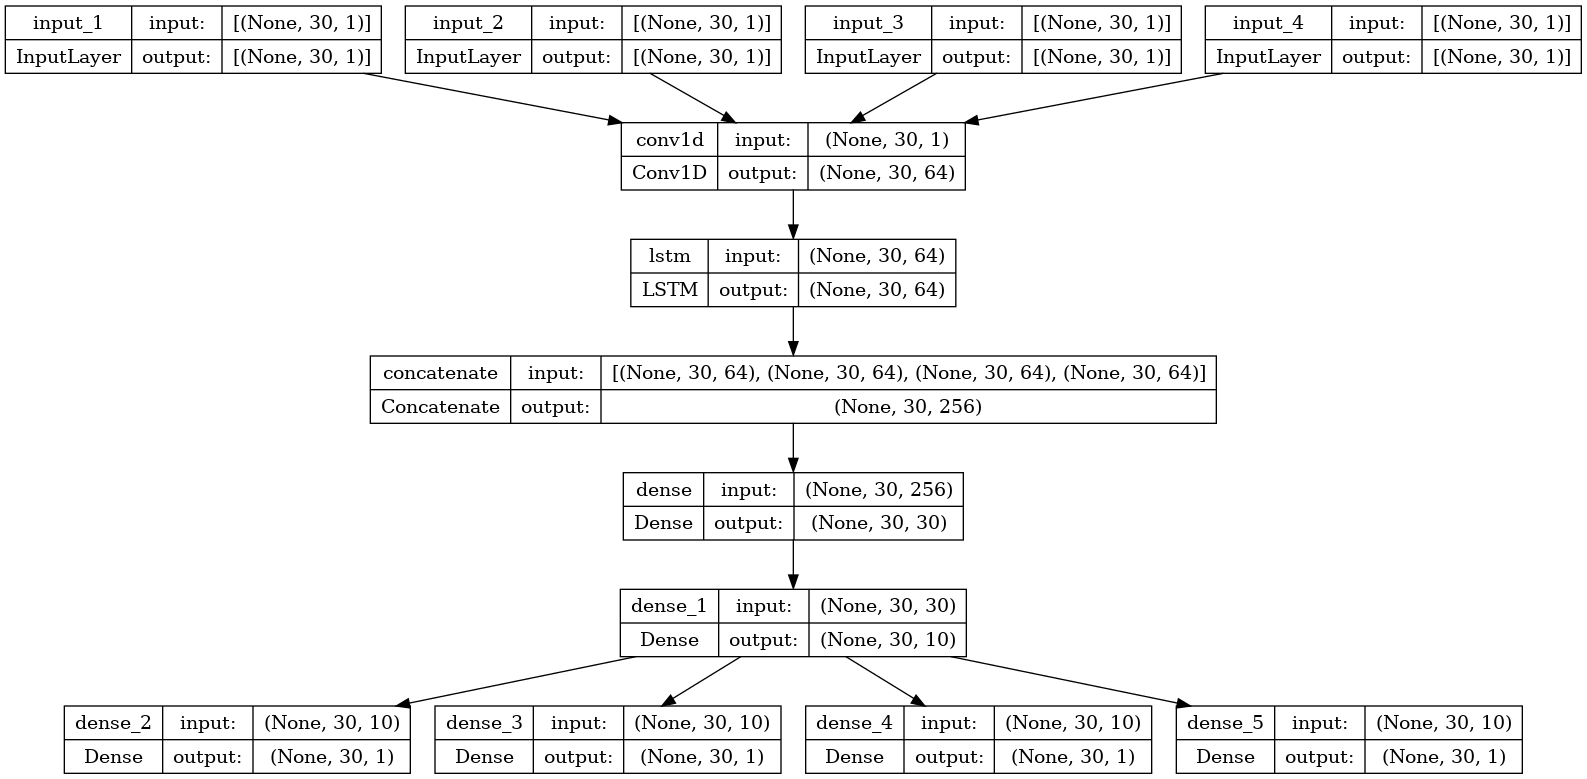

In [47]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_visualization.png', show_shapes=True, show_layer_names=True)

In [48]:


# Lakukan pelatihan model dengan data yang sudah dipersiapkan
history = model.fit(
    [train_sequences[0], train_sequences[1], train_sequences[2], train_sequences[3]],
    [train_labels[0], train_labels[1], train_labels[2], train_labels[3]],
    validation_data=(
        [valid_sequences[0], valid_sequences[1], valid_sequences[2], valid_sequences[3]],
        [valid_labels[0], valid_labels[1], valid_labels[2], valid_labels[3]]
    ),
    epochs=1000,
    batch_size=32
)

Epoch 1/1000
437/437 [==============================] - 23s 21ms/step - loss: 0.9088 - dense_2_loss: 0.2748 - dense_3_loss: 0.1955 - dense_4_loss: 0.0186 - dense_5_loss: 0.4199 - val_loss: 0.9391 - val_dense_2_loss: 0.3316 - val_dense_3_loss: 0.1899 - val_dense_4_loss: 0.0148 - val_dense_5_loss: 0.4028
Epoch 2/1000
437/437 [==============================] - 8s 18ms/step - loss: 0.8794 - dense_2_loss: 0.2701 - dense_3_loss: 0.1862 - dense_4_loss: 0.0112 - dense_5_loss: 0.4119 - val_loss: 0.9197 - val_dense_2_loss: 0.3291 - val_dense_3_loss: 0.1831 - val_dense_4_loss: 0.0107 - val_dense_5_loss: 0.3968
Epoch 3/1000
437/437 [==============================] - 7s 17ms/step - loss: 0.8634 - dense_2_loss: 0.2675 - dense_3_loss: 0.1800 - dense_4_loss: 0.0100 - dense_5_loss: 0.4059 - val_loss: 0.9044 - val_dense_2_loss: 0.3259 - val_dense_3_loss: 0.1769 - val_dense_4_loss: 0.0097 - val_dense_5_loss: 0.3918
Epoch 4/1000
437/437 [==============================] - 8s 18ms/step - loss: 0.8487 - dens

In [49]:
model.save('model.h5')

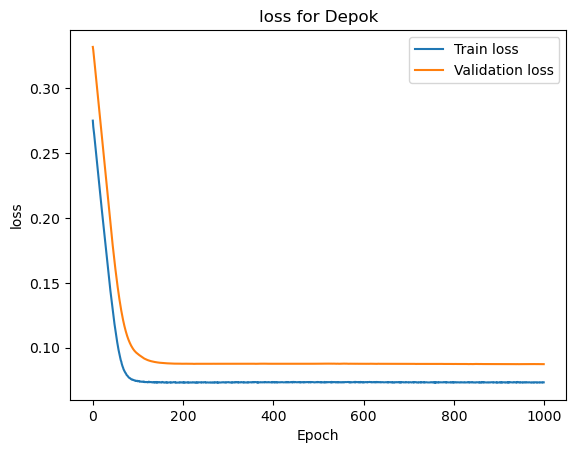

In [50]:
train_mae_depok = history.history['dense_2_loss']  
val_mae_depok = history.history['val_dense_2_loss']  

# Plot MAE pelatihan dan validasi
plt.plot(train_mae_depok, label='Train loss')
plt.plot(val_mae_depok, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('loss for Depok')
plt.legend()
plt.show()

terlihat bahwa train yang kita lakukan berjalan dengan baik 
next todo:
* prediksi dan evaluasi
* bandingkan secara visual
* simpan ke submission

test langsung ke test dataset

In [51]:
test_tma.head(24)

,Waktu,Pintu Air,Tinggi Air,ID,Prediksi 6 Jam Ke Depan
0,2023-01-01 00:00:00,Depok,100.0,1,NaN
1,2023-01-01 00:00:00,Katulampa,20.0,2,NaN
2,2023-01-01 00:00:00,Manggarai,635.0,3,NaN
3,2023-01-01 00:00:00,Marina Ancol,159.0,4,NaN
4,2023-01-01 01:00:00,Depok,133.0,5,NaN
5,2023-01-01 01:00:00,Katulampa,34.6,6,NaN
6,2023-01-01 01:00:00,Manggarai,700.0,7,NaN
7,2023-01-01 01:00:00,Marina Ancol,163.0,8,NaN
8,2023-01-01 02:00:00,Depok,131.0,9,NaN
9,2023-01-01 02:00:00,Katulampa,35.3,10,NaN


hasilnya masih dalam sequence data